# Solutions to Example Exam

This document contains the solution to the example exam for Game Theory.

It also includes some uses of `python` code to confirm hand calculations and/or draw plots (although in the exam the plots would be expected to be done by hand).

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import nashpy as nash

## Q1

### a)

**Definition of a Normal Form Game**

An $N$-player normal form game consists of:

- A finite set of $N$ players.
- An action set for the players:  
  $\{\mathcal{A}_1, \mathcal{A}_2, \dots, \mathcal{A}_N\}$.
- A set of payoff functions for the players:  
  $u_i : \mathcal{A}_1 \times \mathcal{A}_2 \times \dots \times \mathcal{A}_N 
  \to \mathbb{R}$.

[1]

**Definition of a Strictly Dominated Strategy**

In an $N$-player normal form game, an action $a_i \in \mathcal{A}_i$ is said to
be **strictly dominated** if there exists a strategy
$\sigma_i \in \Delta(\mathcal{A}_i)$ such that:

$$
u_i(\sigma_i, s_{(-i)}) > u_i(a_i, s_{(-i)}) \quad \text{for all } s_{(-i)} \in S_{(-i)}.
$$

[1]

**Definition of a Weakly Dominated Strategy**

In an $N$-player normal form game, an action $a_i \in \mathcal{A}_i$
is said to be **weakly dominated** if there exists a
strategy $\sigma_i \in \Delta(\mathcal{A}_i)$ such that:

$$
u_i(\sigma_i, s_{-i}) \geq u_i(s_i, s_{-i})
\quad \text{for all } s_{-i} \in S_{-i},
$$

and

$$
u_i(\sigma_i, \bar{s}) > u_i(s_i, \bar{s})
\quad \text{for some } \bar{s} \in S_{-i}.
$$

[1]

**Definition of a Best response strategy**

In an $N$-player normal form game, a strategy $s^*$ for player $i$ is a
**best response** to some incomplete strategy profile $s_{-i}$ if and only if:

$$
u_i(s^*,\ s_{-i}) \geq u_i(s,\ s_{-i}) \quad \text{for all } s \in \Delta(\mathcal{A}_i).
$$

[1]

**Definition of Nash Equilibrium**

In an $N$-player normal form game, a **Nash equilibrium** is a strategy profile  
$\tilde{s} = (\tilde{s}_1, \tilde{s}_2, \dots, \tilde{s}_N)$ such that:

$$
u_i(\tilde{s}) = \max_{\bar{s}_i \in \Delta(\mathcal{A}_i)} u_i(\bar{s}_i, \tilde{s}_{-i}) \quad \text{for all } i
$$

[1]

### b)

In a two-player game $(A,\ B) \in \left(\mathbb{R}^{m \times n}\right)^2$,
a strategy $\sigma_r^*$ of the row player is a **best response** to a strategy
$\sigma_c$ of the column player if and only if:

$$
\sigma_{r^*}(i) > 0 \quad \Rightarrow \quad (A \sigma_c^\mathsf{T})_i =
\max_{k \in \mathcal{A}_1}(A \sigma_c^\mathsf{T})_k
\quad \text{for all } i \in \mathcal{A}_1
$$

**proof**

The term $(A \sigma_c^\mathsf{T})_i$ represents the utility for the row player
when playing their $i^{\text{th}}$ action. Thus:

$$
\sigma_r A \sigma_c^\mathsf{T} = \sum_{i=1}^{m} \sigma_{r}(i) \cdot (A \sigma_c^\mathsf{T})_i
$$

Let $u = \max_k (A \sigma_c^\mathsf{T})_k$. Then:

$$
\begin{align}
\sigma_r A \sigma_c^\mathsf{T}
&= \sum_{i=1}^{m} \sigma_r(i) \left[u - u + (A \sigma_c^\mathsf{T})_i\right] \\
&= \sum_{i=1}^{m} \sigma_r(i) u - \sum_{i=1}^{m} \sigma_r(i) (u - (A \sigma_c^\mathsf{T})_i) \\
&= u - \sum_{i=1}^{m} \sigma_r(i) (u - (A \sigma_c^\mathsf{T})_i)
\end{align}
$$

Since $u - (A \sigma_c^\mathsf{T})_i \geq 0$ for all $i$,
the maximum expected utility for the row player is $u$, and this occurs **if and only if**:

$$
\sigma_r(i) > 0 \quad \Rightarrow \quad (A \sigma_c^\mathsf{T})_i = u
$$

as required.


### c)

ii. For $\sigma_r=(1, 0)$ $\sigma_c=(0, 1)$ to be a pair of best responses:

- The first row has to be a best response to the second column: it is not. The first row gets a utility of -2, the second row gets a utility of 3.

In [2]:
M_r = np.array(
    (
        (4, -2),
        (-1, 3),
    )
)
M_c = np.array(
    (
        (2, -2),
        (-3, 2),
    )
)
sigma_r = np.array((1, 0))
sigma_c = np.array((0, 1))
game = nash.Game(M_r, M_c)
game.is_best_response(sigma_r, sigma_c)

(False, False)

ii. For $\sigma_r=(1/5, 4/5)$ $\sigma_c=(0, 1)$ to be a pair of best responses:

The second column must be a best response to $\sigma_r$: The theorem states that the following equality must hold:

$$
(\sigma_r M_c )_2 =
\max_{k \in \{1, 2\}}(\sigma_r M_c)_k
$$

We have:

$$
\sigma_r M_c = (1 / 5, 4 / 5) \begin{pmatrix}
2 & -2 \\
-3 & 2
\end{pmatrix} = (2 / 5 - 12 / 5, -2 / 5 + 8 / 5) = (-2, 6/5)
$$

So the $\sigma_c$ is a best response to $\sigma_r$.

For $\sigma_r$ to be a best resposne the Theorem states that:

$$
(M_r \sigma_c ^{T})_1 = (M_r \sigma_c ^{T})_2
$$

We have:

$$
M_r \sigma_c ^{T} = \begin{pmatrix}
4 & -2 \\
-1 & 3
\end{pmatrix}\begin{pmatrix}
0 \\
1
\end{pmatrix}=\begin{pmatrix}
-2 \\
3
\end{pmatrix}
$$

So $\sigma_r$ is not a best response to $\sigma_c$.

In [3]:
sigma_r = np.array((1 / 5, 4 / 5))
sigma_c = np.array((0, 1))
game = nash.Game(M_r, M_c)
game.is_best_response(sigma_r, sigma_c)

(False, True)

iii. For $\sigma_r=(5/9, 4/9)$ $\sigma_c=(1/2, 1/2)$ to be a pair of best responses:

The $\sigma_c$ must be a best response to $\sigma_r$: The theorem states that the following equality must hold:

$$
(\sigma_r M_c )_1 = (\sigma_r M_c )_2
$$

We have:

$$
\sigma_r M_c = (5 / 9, 4 / 9) \begin{pmatrix}
2 & -2 \\
-3 & 2
\end{pmatrix} = (10 / 9 - 12 / 9, -10 / 9 + 8 / 9) = (-2 / 9, -2/9)
$$

So the $\sigma_c$ is a best response to $\sigma_r$.

For $\sigma_r$ to be a best response the Theorem states that:

$$
(M_r \sigma_c ^{T})_1 = (M_r \sigma_c ^{T})_2
$$

We have:

$$
M_r \sigma_c ^{T} = \begin{pmatrix}
4 & -2 \\
-1 & 3
\end{pmatrix}\begin{pmatrix}
1/2 \\
1/2
\end{pmatrix}=\begin{pmatrix}
2 - 1 \\
-1 /2 + 3/ 2
\end{pmatrix}=\begin{pmatrix}
1 \\
1
\end{pmatrix}
$$

So $\sigma_r$ is a best response to $\sigma_c$.

In [4]:
sigma_r = np.array((5 / 9, 4 / 9))
sigma_c = np.array((1 / 2, 1 / 2))
M_r @ sigma_c.T, sigma_r @ M_c

(array([1., 1.]), array([-0.22222222, -0.22222222]))

### d)

From our previous question we have the Mixed Nash equilibrium: $\sigma_r=(5/9, 4/9)\qquad \sigma_c=(1/2, 1/2)$. From inspection of the best response in action space we also see that we have:

- $\sigma_r=(1, 0)\qquad \sigma_c=(1, 0)$ as the first row/column are best responses to each other.
- $\sigma_r=(0, 1)\qquad \sigma_c=(0, 1)$ as the second row/column are best responses to each other.

## Q2

### (a)

1. The standard definition of the Prisoners Dilemma is:

$$
M_r = 
\begin{pmatrix}
    R & S\\
    T & P
\end{pmatrix}
$$

with $T > R > P > S$ and $2R > T + S$. In this case we have:

$$R=b+c\qquad T=b+2c \qquad S=c \qquad P=2c$$

As $b > c > 0$ we have:

- $b + 2c > b + c$ so $T > R$
- $b + c > 2c$ so $R > P$
- $2c>c$ so $P > S$
- $2b + 2c > b + 3 c$ so $2T > T + S$


### (b)

From investigation of the best response in action space we see that there is a single best response (as $T>R$ and $P>S$):

$$\sigma_r=(0,1)\qquad\sigma_c=(0, 1)$$

### (c)

We have:

$$
\begin{align}
f_M & = \frac{(b  + c)(i - 1) + (N - i) c}{N - 1}\\
f_R & = \frac{(b  + 2c)i + (N - i - 1) 2c}{N - 1}\\
\end{align}
$$

so:

$$
\gamma = \frac{f_R}{f_M} = \frac{2Nc + bi - 2c}{Nc + bi - b -c}
$$

thus:

$$
\rho_i = \frac{1 + \sum_{j=1}^{i - 1}\prod_{k=1}^{j} \frac{2Nc + bi - 2c}{Nc + bi - b -c}}{1 + \sum_{j=1}^{N - 1}\prod_{k=1}^{j} \frac{2Nc + bi - 2c}{Nc + bi - b -c}}
$$

In [28]:
import sympy as sym

i = sym.Symbol("i")
b = sym.Symbol("b")
c = sym.Symbol("c")
N = sym.Symbol("N")
f_M = ((b + c) * (i - 1) + (N - i) * c) / (N - 1)
f_R = ((b + 2 * c) * (i) + (N - i - 1) * 2 * c) / (N - 1)
gamma = sym.simplify(f_R / f_M)
gamma

(2*N*c + b*i - 2*c)/(N*c + b*i - b - c)

### (d)

For $N=2$:

$$
\begin{align}
    \rho_1 & = \frac{1}{1 + \frac{4c + b - 2c}{2c + b - b -c}}\\
           & = \frac{1}{\frac{c + (b  + 2c)}{c}}\\
           & = \frac{c}{3c + b}\\
\end{align}
$$

In [29]:
rho_1 = sym.simplify(1 / (1 + gamma.subs({i: 1}))).subs({N :2})
rho_1

c/(b + 3*c)

For $N=3$:

$$
\begin{align}
    \rho_1 & = \frac{1}{1 + \frac{6c + b - 2c}{3c + b - b -c} + \frac{6c + 2b - 2c}{3c + 2b - b -c}\frac{6c + b - 2c}{3c + b - b -c}}\\
           & = \frac{2 c}{3 b + 14 c}\\
\end{align}
$$

In [30]:
rho_1 = sym.simplify(1 / (1 + gamma.subs({i: 1}) + gamma.subs({i: 1})* gamma.subs({i: 2}))).subs({N :3})
rho_1

2*c/(3*b + 14*c)

For $N=4$:

$$
\begin{align}
    \rho_1 & = \frac{1}{1 + \frac{8c + b - 2c}{4c + b - b -c} + \frac{8c + b - 2c}{4c + b - b -c}\frac{8c + 2b - 2c}{4c + 2b - b -c} + \frac{8c + b - 2c}{4c + b - b -c}\frac{8c + 2b - 2c}{4c + 2b - b -c}\frac{8c + 3b - 2c}{4c + 3b - b -c}}\\
           & = 
\frac{c \left(6 b + 9 c\right)}{3\left(4 b^{2} + 33 b c + 45 c^{2}\right)}\\
\end{align}
$$

In [32]:
rho_1 = sym.simplify(1 / (1 + gamma.subs({i: 1}) + gamma.subs({i: 1})* gamma.subs({i: 2})+ gamma.subs({i: 1})* gamma.subs({i: 2})* gamma.subs({i: 3}))).subs({N :4})
rho_1

c*(6*b + 9*c)/(3*(4*b**2 + 33*b*c + 45*c**2))

### (e)

For $N=4$ we have:

$$
\begin{align}
\lim_{b\to \infty}\frac{c \left(6 b + 9 c\right)}{3\left(4 b^{2} + 33 b c + 45 c^{2}\right)}&=\lim_{b\to \infty}\frac{c \left(6 /b + 9 c/b^2\right)}{3\left(4  + 33 c/b + 45 c^{2}/b^2\right)}\\
&=0
\end{align}
$$

In [33]:
sym.limit(rho_1, b, sym.oo)

0

$$
\begin{align}
\lim_{b\to c}\frac{c \left(6 b + 9 c\right)}{3\left(4 b^{2} + 33 b c + 45 c^{2}\right)}&=\frac{c \left(6 c + 9 c\right)}{3\left(4 c^{2} + 33 c c + 45 c^{2}\right)}\\
&=\frac{15 c^2 }{246 c^{2}}\\
&=\frac{15}{246}=\frac{5}{82}
\end{align}
$$

In [35]:
sym.limit(rho_1, b, c)

5/82

This implies that even with a reward of $b$ that is incredibly large in comparison to $c$ that in fact there will be no chance of a mutation taking over. It also shows that if $b$ is low: goes to $c$ that the probability of taking over is low. It could be the highest value: we do not know.

The above answers the question. Here is an example with $c=1$:

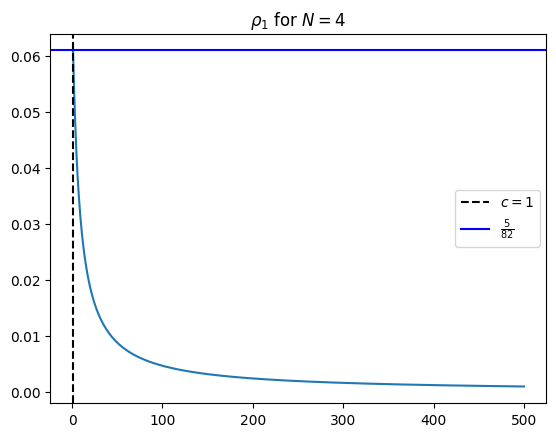

In [36]:
plt.figure()
bs = np.linspace(1, 500, 500)
rho_1_values = [rho_1.subs({c: 1, b: value}) for value in bs]
plt.plot(bs, rho_1_values)
plt.title(r"$\rho_1$ for $N=4$")
plt.axvline(1, label="$c=1$", color="black", linestyle="--")
plt.axhline(5/82, label=r"$\frac{5}{82}$", color="blue")

plt.legend();

We could (not part of the question, I'm including it here just because it is interesting __and__ could be part of a similar question), confirm that $16/259$ is the highest chance of obtaining absorption and happens for the lowest possible value of $b$ by computing $\frac{d\rho_1}{dt}$:

In [37]:
sym.factor(sym.diff(rho_1, b))

-c*(8*b**2 + 24*b*c + 9*c**2)/(4*b**2 + 33*b*c + 45*c**2)**2

This is negative.

## Q3

### (a)

A **characteristic function game** $G$ is given by a pair $(N, v)$ where $N$ is the number of players and $v: 2^{[N]} \to \mathbb{R}$ is a **characteristic function** which maps every coalition of players to a payoff.

### (b)

Given a cooperative game $G=(N,v)$, the **Shapley value** of player $i$
is denoted by $\phi_i(G)$ and defined as:

$$
\phi_i(G)=\frac{1}{N!}\sum_{\pi\in\Pi_n}\Delta_\pi^G(i)
$$

where 

$$
\Delta_\pi^G(i)=v(S_{\pi}(i)\cup \{i\})-v(S_{\pi}(i))
$$


### (c)

For $v_1$ we have:

| Permutation | Marginal Contribution of 1 | Marginal Contribution of 2 | Marginal Contribution of 3 |
|-------------|----------------------------|----------------------------|----------------------------|
| (1, 2, 3)   |       8                    |          2                 |   20                       |
| (1, 3, 2)   |       8                    |          12                |     10                     |
| (2, 1, 3)   |       5                    |           5                |      20                    |
| (2, 3, 1)   |       19                   |           5                |      6                     |
| (3, 1, 2)   |       9                    |           12               |       9                    |
| (3, 2, 1)   |       19                   |            2               |      9                     |
| $\Sigma$    |       68                   |            38              |      74                    |
| $\phi$      |       $68/6\approx 11.333$ |    $38/6\approx 6.333$     |        $74/6\approx 12.333$|

In [12]:
import coopgt.shapley_value

v_1 = {
    (): 0,
    (1,): 8,
    (2,): 5,
    (3,): 9,
    (1, 2): 10,
    (2, 3): 11,
    (1, 3): 18,
    (1, 2, 3): 30,
}

shapley_1 = coopgt.shapley_value.calculate(
    characteristic_function=v_1
)
shapley_1

array([11.33333333,  6.33333333, 12.33333333])

For $v_2$ we have:

| Permutation | Marginal Contribution of 1 | Marginal Contribution of 2 | Marginal Contribution of 3 |
|-------------|----------------------------|----------------------------|----------------------------|
| (1, 2, 3)   |       80                   |          0                 |    0                       |
| (1, 3, 2)   |       80                   |          0                 |    0                       |
| (2, 1, 3)   |       70                   |          10                |       0                    |
| (2, 3, 1)   |       68                   |          10                |      2                     |
| (3, 1, 2)   |       68                   |          0                 |      12                    |
| (3, 2, 1)   |       68                   |            0               |      12                    |
| $\Sigma$    |       434                  |            20              |      26                    |
| $\phi$      |      $434/6\approx 72.333$ |    $20/6\approx 3.333$     |        $26/6\approx 4.333$ |








In [13]:
v_2 = {
    (): 0,
    (1,): 80,
    (2,): 10,
    (3,): 12,
    (1, 2): 80,
    (2, 3): 12,
    (1, 3): 80,
    (1, 2, 3): 80,
}

shapley_2 = coopgt.shapley_value.calculate(
    characteristic_function=v_2
)
shapley_2

array([72.33333333,  3.33333333,  4.33333333])

### (d)

Take any permutation $\pi$ of the players.  
Create a new permutation $\pi'$ by swapping the positions of $i$ and $j$ in $\pi$.

In $\pi$, the set of players before $i$ is $S_{\pi}(i)$.  
In $\pi'$, the set of players before $j$ is exactly the same:

$$
S_{\pi'}(j) = S_{\pi}(i)
$$

The marginal contribution of $i$ in $\pi$ is

$$
v(S_{\pi}(i)\cup\{i\}) - v(S_{\pi}(i)).
$$

The marginal contribution of $j$ in $\pi'$ is


$$
v(S_{\pi'}(j)\cup\{j\}) - v(S_{\pi'}(j))
  = v(S_{\pi}(i)\cup\{j\}) - v(S_{\pi}(i)).
$$

Since $i$ and $j$ are symmetric, for any coalition $S$ we have

$$
v(S\cup\{i\}) = v(S\cup\{j\}).
$$

Applying this with $S=P_i(\pi)$ shows that the two marginal contributions above are equal.

Thus, for every permutation $\pi$, the contribution of $i$ in $\pi$ matches the contribution of $j$ in the swapped permutation $\pi'$.  
Because the Shapley value is the average over all permutations, these equal contributions imply that the Shapley value satisfies the symmetry property.

### (e)

We need to show that $\lambda^{+} = \lambda^{G_1} + \lambda^{G_2}$ for the two games of part (a).

First let us compute the new characteristic function game:

$$
v^+(c)
\begin{cases}
0&\text{ if }c=\emptyset\\
88&\text{ if }c=\{1\}\\
15&\text{ if }c=\{2\}\\
21&\text{ if }c=\{3\}\\
90&\text{ if }c=\{1, 2\}\\
23&\text{ if }c=\{2, 3\}\\
98&\text{ if }c=\{1, 3\}\\
110&\text{ if }c=\{1, 2, 3\}
\end{cases}
$$

For $v^+$ we have:

| Permutation | Marginal Contribution of 1 | Marginal Contribution of 2 | Marginal Contribution of 3 |
|-------------|----------------------------|----------------------------|----------------------------|
| (1, 2, 3)   |       88                   |          2                 |   20                       |
| (1, 3, 2)   |       88                   |          12                |   10                       |
| (2, 1, 3)   |       75                   |          15                |       20                   |
| (2, 3, 1)   |       87                   |          15                |      8                     |
| (3, 1, 2)   |       77                   |          12                 |      21                    |
| (3, 2, 1)   |       87                   |            2               |      21                    |
| $\Sigma$    |       502                  |            58              |      100                    |
| $\phi$      |      $502/6\approx 83.667$ |    $58/6\approx 9.667$     |        $26/6\approx 16.667$ |





In [14]:
v_plus = {
    (): 0,
    (1,): 8 + 80,
    (2,): 5 + 10,
    (3,): 9 + 12,
    (1, 2): 10 + 80,
    (2, 3): 11 + 12,
    (1, 3): 18 + 80,
    (1, 2, 3): 30 + 80,
}

shapley_plus = coopgt.shapley_value.calculate(
    characteristic_function=v_plus
)
shapley_plus

array([83.66666667,  9.66666667, 16.66666667])

In [15]:
shapley_1 + shapley_2

array([83.66666667,  9.66666667, 16.66666667])

## Q4

### a)

Let $X$ be a finite set of alternatives. A **preference function** for a voter
is a strict linear order $\succ$ on $X$, meaning that for all distinct
alternatives $x, y, z \in X$:

- **Asymmetry**: if $x \succ y$, then not $y \succ x$
- **Transitivity**: if $x \succ y$ and $y \succ z$, then $x \succ z$
- **Completeness**: for all $x \ne y$, either $x \succ y$ or $y \succ x$

We refer to a complete list of $n$ voters’ preference functions as a
**preference profile**.


### b)

Let $X$ be a set of at alternatives with $|X| \geq 3$.
There exists no social welfare function that satisfies **all** of the following
properties:

1. **Unrestricted domain**: all possible preference profiles are allowed
2. **Pareto efficiency**: if all voters prefer $x$ over $y$, then $x$ is ranked
   above $y$
3. **Independence of irrelevant alternatives (IIA)**: the group’s relative
   ranking of $x$ and $y$ depends only on how individuals rank $x$ vs $y$
4. **Non-dictatorship**: there is no single voter whose preferences always
   determine the outcome

In short, there is **no perfect voting rule** that aggregates individual
preferences into a consistent group ranking while satisfying all of these
fairness criteria.

### c)

$$
\begin{array}{c|ccc}
\text{Voters} & \text{1st} & \text{2nd} & \text{3rd} \\
\hline
4 & A & B & C \\
3 & B & C & A \\
2 & C & A & B \\
\end{array}
$$

i.

- **$A$ vs $B$:**  
  - Prefer $A$: $4$ (from $A\!\succ\!B\!\succ\!C$) $+$ $2$ (from $C\!\succ\!A\!\succ\!B$) $=6$  
  - Prefer $B$: $3$  
  So $A$ beats $B$, $6$–$3$.

- **$A$ vs $C$:**  
  - Prefer $A$: $4$  
  - Prefer $C$: $3 + 2 = 5$  
  So $C$ beats $A$, $5$–$4$.

- **$B$ vs $C$:**  
  - Prefer $B$: $4 + 3 = 7$  
  - Prefer $C$: $2$  
  So $B$ beats $C$, $7$–$2$.

ii.

Results:  
- $A$ beats $B$  
- $B$ beats $C$  
- $C$ beats $A$  

So **no Condorcet winner** exists.

In [16]:
import pref_voting.profiles
import pref_voting.c1_methods

profile = pref_voting.profiles.Profile(
    [[0, 1, 2]] * 4 + [[1, 2, 0]] * 3 + [[2, 0, 1]] * 2
)
pref_voting.c1_methods.condorcet(profile)

[0, 1, 2]

iii.

No. We have  
$$A \succ B,\quad B \succ C,\quad C \succ A,$$  
so the collective preference is **intransitive**.


### d)

i.

With three alternatives, assign:  
- 2 points for 1st,  
- 1 point for 2nd,  
- 0 points for 3rd.

Compute:

- 4 voters $A\!\succ\!B\!\succ\!C$:  
  $A=8,\ B=4,\ C=0$
- 3 voters $B\!\succ\!C\!\succ\!A$:  
  $B=6,\ C=3,\ A=0$
- 2 voters $C\!\succ\!A\!\succ\!B$:  
  $C=4,\ A=2,\ B=0$

- $A = 8 + 0 + 2 = 10$  
- $B = 4 + 6 + 0 = 10$  
- $C = 0 + 3 + 4 = 7$

ii.

$A$ and $B$ tie with $10$ points each.  
So the **Borda winners** are **$A$ and $B$** (a tie).


iii.

- Condorcet: **no winner** (cycle).  
- Borda: **tie between $A$ and $B$**.

So they do **not** select the same outcome.

In [17]:
import pref_voting.scoring_methods

pref_voting.scoring_methods.borda(profile)

[0, 1]

### e)

A voting rule satisfies IIA if the social ranking between two alternatives $x$ and $y$ depends **only** on how voters rank $x$ versus $y$. Changing how voters rank some *other* alternative $z$ must not affect the social comparison of $x$ and $y$.

Example:

- 3 voters: $A \succ B \succ C$  
- 2 voters: $B \succ C \succ A$

Borda scores:  

- $A=6,\ B=7,\ C=2$

Society prefers **$B$ to $A$**.

Now remove $C$ (but keep individual rankings of $A$ vs $B$ the same):

- 3 voters: $A \succ B$  
- 2 voters: $B \succ A$

New Borda scores (1 point for 1st): 

- $A=3,\ B=2$

Society now prefers **$A$ to $B$**.

So the social ranking of $A$ vs $B$ changed even though voters’ preferences between $A$ and $B$ stayed the same.  
Thus, **Borda violates IIA**.